300


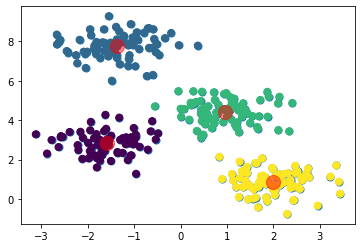

In [174]:
#bai 1
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
print(len(X))

In [175]:
import math 
def timdiemgannhat(X, centers):
    cum1 = list(range(300))
    cum2 = list(range(300))
    cum3 = list(range(300))
    cum4 = list(range(300))
    dem = 0
    cum1 = np.sqrt((X[0:,0] - centers[0,0])**2+(X[0:,1] - centers[0,1])**2)

    cum2 = np.sqrt((X[0:,0] - centers[1,0])**2+(X[0:,1] - centers[1,1])**2)

    cum3 = np.sqrt((X[0:,0] - centers[2,0])**2+(X[0:,1] - centers[2,1])**2)

    cum4 = np.sqrt((X[0:,0] - centers[3,0])**2+(X[0:,1] - centers[3,1])**2)

    ax = list(range(300))
    labels = np.array(ax)
    for i in cum1:
        if cum1[dem]<cum2[dem] and cum1[dem]<cum3[dem] and cum1[dem]<cum4[dem]:
            labels[dem] = 0
        elif cum2[dem]<cum3[dem] and cum2[dem]<cum4[dem]:
            labels[dem] = 1
        elif cum3[dem]<cum4[dem]:
            labels[dem] = 2
        else:
            labels[dem] = 3
        dem +=1
    return labels

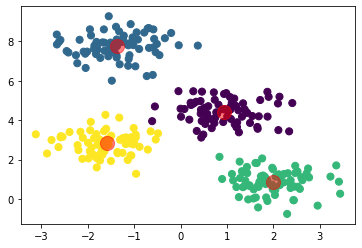

In [176]:
# bai 2
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    
    for x in range(1,7):
        # 2a. Assign labels based on closest center
        labels = timdiemgannhat(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

diem  [[0, 1]]  gan centroid [[1.95649619 0.86945376]]  nhat


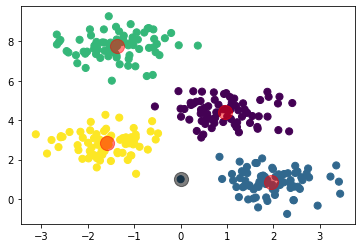

In [177]:
#cau 3
x = [[0,1]]
X = np.vstack([X, x])
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

subList = x[0]
plt.scatter(subList[0], subList[1], c='black', s=200, alpha=0.5);


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

labels = pairwise_distances_argmin(x, centers)
print("diem ",x, " gan centroid",centers[labels]," nhat")